#  Data Wrangling
Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re



Load the Dataset

In [2]:
listings = pd.read_csv('./listings.csv')

Initial Data Inspection

In [3]:
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,45728646,Guest suite in Montréal · ★4.69 · 1 bedroom · ...,753212,Georges,NaN,Le Plateau-Mont-Royal,45.538850,-73.560370,Private room,21.0,31,13,2022-11-01,0.34,3,286,0,NaN
1,27438926,Rental unit in Montréal · 1 bedroom · 1 bed · ...,202884942,Abbie,NaN,Rosemont-La Petite-Patrie,45.531530,-73.604250,Entire home/apt,40.0,90,0,NaN,NaN,1,0,0,NaN
2,910248010739253417,Rental unit in Montréal · ★New · 1 bedroom · 1...,65607998,Nabil,NaN,Verdun,45.454424,-73.547104,Entire home/apt,55.0,31,0,NaN,NaN,1,27,0,NaN
3,854389634569393267,Rental unit in Montréal · 2 bedrooms · 2 beds ...,368730072,Nouhaila,NaN,Ville-Marie,45.502018,-73.556932,Entire home/apt,160.0,31,0,NaN,NaN,1,364,0,NaN
4,767425771328334796,Rental unit in Montréal · ★4.80 · Studio · 1 b...,162017221,Damian,NaN,Ville-Marie,45.517690,-73.560770,Entire home/apt,60.0,31,4,2023-08-16,0.39,2,0,4,NaN


In [4]:
listings.shape

(8807, 18)

In [5]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              8807 non-null   int64  
 1   name                            8807 non-null   object 
 2   host_id                         8807 non-null   int64  
 3   host_name                       8807 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   8807 non-null   object 
 6   latitude                        8807 non-null   float64
 7   longitude                       8807 non-null   float64
 8   room_type                       8807 non-null   object 
 9   price                           8692 non-null   float64
 10  minimum_nights                  8807 non-null   int64  
 11  number_of_reviews               8807 non-null   int64  
 12  last_review                     69

Dropping Columns from the Dataset

In [6]:
cleaned_df = listings.drop(columns=['neighbourhood_group', 'host_name', 'license', 'last_review', 'latitude', 'longitude', 'id'])

In [7]:
cleaned_df.head()

,name,host_id,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Guest suite in Montréal · ★4.69 · 1 bedroom · ...,753212,Le Plateau-Mont-Royal,Private room,21.0,31,13,0.34,3,286,0
1,Rental unit in Montréal · 1 bedroom · 1 bed · ...,202884942,Rosemont-La Petite-Patrie,Entire home/apt,40.0,90,0,NaN,1,0,0
2,Rental unit in Montréal · ★New · 1 bedroom · 1...,65607998,Verdun,Entire home/apt,55.0,31,0,NaN,1,27,0
3,Rental unit in Montréal · 2 bedrooms · 2 beds ...,368730072,Ville-Marie,Entire home/apt,160.0,31,0,NaN,1,364,0
4,Rental unit in Montréal · ★4.80 · Studio · 1 b...,162017221,Ville-Marie,Entire home/apt,60.0,31,4,0.39,2,0,4


Dropping Duplicates

In [8]:
cleaned_df = cleaned_df.drop_duplicates()

In [9]:
cleaned_df.shape


(8747, 11)

In [10]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8747 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            8747 non-null   object 
 1   host_id                         8747 non-null   int64  
 2   neighbourhood                   8747 non-null   object 
 3   room_type                       8747 non-null   object 
 4   price                           8636 non-null   float64
 5   minimum_nights                  8747 non-null   int64  
 6   number_of_reviews               8747 non-null   int64  
 7   reviews_per_month               6928 non-null   float64
 8   calculated_host_listings_count  8747 non-null   int64  
 9   availability_365                8747 non-null   int64  
 10  number_of_reviews_ltm           8747 non-null   int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 820.0+ KB


Dropping Values Missing for Price

Deleting missing records for the main feature that I will predict

In [11]:
unique_price_values = cleaned_df['price'].unique()

In [12]:
unique_price_values

array([2.10000e+01, 4.00000e+01, 5.50000e+01, 1.60000e+02, 6.00000e+01,
               nan, 8.00000e+02, 1.20000e+02, 3.50000e+01, 1.10000e+02,
       5.70000e+01, 6.50000e+01, 8.00000e+01, 1.75000e+02, 1.15000e+02,
       2.00000e+01, 7.50000e+01, 3.59000e+02, 1.30000e+02, 1.10218e+05,
       1.09000e+02, 7.50000e+02, 8.50000e+01, 1.00000e+02, 9.00000e+01,
       2.03000e+02, 1.42000e+02, 1.83000e+02, 4.80000e+01, 2.60000e+01,
       1.19000e+02, 5.30000e+01, 5.60000e+01, 7.70000e+01, 1.32000e+02,
       1.50000e+02, 2.10000e+02, 1.40000e+02, 1.35000e+02, 6.10000e+01,
       1.60000e+01, 1.56000e+02, 2.20000e+02, 1.54000e+02, 4.50000e+01,
       1.45000e+02, 9.90000e+01, 2.30000e+01, 7.80000e+01, 9.20000e+01,
       8.60000e+01, 6.60000e+01, 6.70000e+01, 9.60000e+01, 2.49000e+02,
       7.30000e+01, 3.20000e+01, 1.02000e+02, 7.40000e+01, 5.90000e+01,
       1.92000e+02, 5.10000e+01, 4.10000e+01, 1.81000e+02, 7.00000e+01,
       1.76000e+02, 6.80000e+01, 1.05000e+02, 1.99000e+02, 3.000

In [13]:
cleaned_df['price'].replace(to_replace=['null', '', 'NaN', None], value=pd.NA, inplace=True)
cleaned_df.dropna(subset=['price'], inplace=True)

In [14]:
cleaned_df.shape

(8636, 11)

Handling Missing Values for zero Reviews per Month

In [15]:
cleaned_df['reviews_per_month'] = cleaned_df['reviews_per_month'].fillna(0)

In [16]:
cleaned_df.tail()

,name,host_id,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
8802,Rental unit in Montréal · ★4.61 · 1 bedroom · ...,223679880,Ville-Marie,Entire home/apt,156.0,2,71,2.47,48,365,22
8803,Condo in Montréal · ★4.75 · 1 bedroom · 1 bed ...,162579704,Côte-des-Neiges-Notre-Dame-de-Grâce,Entire home/apt,91.0,1,65,1.54,25,82,29
8804,Rental unit in Montréal · 2 bedrooms · 2 beds ...,428391760,Le Plateau-Mont-Royal,Entire home/apt,150.0,31,0,0.00,11,365,0
8805,Rental unit in Montreal · ★4.63 · Studio · 1 b...,7250257,Le Plateau-Mont-Royal,Entire home/apt,54.0,120,16,0.33,18,227,1
8806,Rental unit in Montréal · ★4.74 · 3 bedrooms ·...,187855627,Le Plateau-Mont-Royal,Entire home/apt,217.0,2,196,2.92,17,300,51


Extracting and Transforming Data
Parsing information from combined fields in the 'name' column into separate, more usable columns. For example, extracting 'number_bedrooms', 'number_beds', 'number_bath', and creating a 'shared_bathrooms' boolean column from the text data.

In [17]:
def parse_name_info(name):
    try:
        new_columns = name.split(' · ')
        bedrooms = new_columns[-3] if len(new_columns) >= 3 else None
        beds = new_columns[-2] if len(new_columns) >= 2 else None
        bath = new_columns[-1] if len(new_columns) >= 1 else None
        return bedrooms, beds, bath
    except:
        return None, None, None


In [18]:
cleaned_df[['number_bedrooms', 'number_beds', 'number_bath']] = cleaned_df['name'].apply(
    lambda x: pd.Series(parse_name_info(x))
)

In [19]:
data_cleaned = cleaned_df.drop(columns=['name'])

In [20]:
data_cleaned.head()


,host_id,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,number_bedrooms,number_beds,number_bath
0,753212,Le Plateau-Mont-Royal,Private room,21.0,31,13,0.34,3,286,0,1 bedroom,1 bed,1 shared bath
1,202884942,Rosemont-La Petite-Patrie,Entire home/apt,40.0,90,0,0.00,1,0,0,1 bedroom,1 bed,1 bath
2,65607998,Verdun,Entire home/apt,55.0,31,0,0.00,1,27,0,1 bedroom,1 bed,1 bath
3,368730072,Ville-Marie,Entire home/apt,160.0,31,0,0.00,1,364,0,2 bedrooms,2 beds,1 bath
4,162017221,Ville-Marie,Entire home/apt,60.0,31,4,0.39,2,0,4,Studio,1 bed,1 bath


In [21]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         8636 non-null   int64  
 1   neighbourhood                   8636 non-null   object 
 2   room_type                       8636 non-null   object 
 3   price                           8636 non-null   float64
 4   minimum_nights                  8636 non-null   int64  
 5   number_of_reviews               8636 non-null   int64  
 6   reviews_per_month               8636 non-null   float64
 7   calculated_host_listings_count  8636 non-null   int64  
 8   availability_365                8636 non-null   int64  
 9   number_of_reviews_ltm           8636 non-null   int64  
 10  number_bedrooms                 8636 non-null   object 
 11  number_beds                     8636 non-null   object 
 12  number_bath                     86

In [22]:
def extract_first_number(text):
    if pd.isna(text):
        return None
    numbers = re.findall(r'\d+', text)
    return int(numbers[0]) if numbers else None

def parse_bedrooms(text):
    if pd.isna(text):
        return None
    if 'studio' in text.lower():
        return 1
    return extract_first_number(text)

def is_shared_bath(text):
    if pd.isna(text):
        return False
    return 'shared' in text.lower()

data_cleaned['number_bedrooms'] = data_cleaned['number_bedrooms'].apply(parse_bedrooms)
data_cleaned['number_beds'] = data_cleaned['number_beds'].apply(extract_first_number)
data_cleaned['shared_bathrooms'] = data_cleaned['number_bath'].apply(is_shared_bath)
data_cleaned['number_bath'] = data_cleaned['number_bath'].apply(extract_first_number)



data_cleaned.head()



,host_id,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,number_bedrooms,number_beds,number_bath,shared_bathrooms
0,753212,Le Plateau-Mont-Royal,Private room,21.0,31,13,0.34,3,286,0,1.0,1.0,1.0,True
1,202884942,Rosemont-La Petite-Patrie,Entire home/apt,40.0,90,0,0.00,1,0,0,1.0,1.0,1.0,False
2,65607998,Verdun,Entire home/apt,55.0,31,0,0.00,1,27,0,1.0,1.0,1.0,False
3,368730072,Ville-Marie,Entire home/apt,160.0,31,0,0.00,1,364,0,2.0,2.0,1.0,False
4,162017221,Ville-Marie,Entire home/apt,60.0,31,4,0.39,2,0,4,1.0,1.0,1.0,False


Saving New Cleaned Data into a csv File

In [23]:

data_cleaned.to_csv('./listings_montreal_transformed.csv')
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         8636 non-null   int64  
 1   neighbourhood                   8636 non-null   object 
 2   room_type                       8636 non-null   object 
 3   price                           8636 non-null   float64
 4   minimum_nights                  8636 non-null   int64  
 5   number_of_reviews               8636 non-null   int64  
 6   reviews_per_month               8636 non-null   float64
 7   calculated_host_listings_count  8636 non-null   int64  
 8   availability_365                8636 non-null   int64  
 9   number_of_reviews_ltm           8636 non-null   int64  
 10  number_bedrooms                 8606 non-null   float64
 11  number_beds                     8627 non-null   float64
 12  number_bath                     86


Dataset has 11 numerical columns, and 3 categorical columns which there defined as object


In [24]:
for col in data_cleaned.select_dtypes(include=['object', 'bool']):
    data_cleaned[col] = data_cleaned[col].astype('category')

cat_col = data_cleaned.select_dtypes(include=['category'])

for col in cat_col:
    print('Unique Values of {} are \n'.format(col),data_cleaned[col].unique())
    print('*'*90)


Unique Values of neighbourhood are 
 ['Le Plateau-Mont-Royal', 'Rosemont-La Petite-Patrie', 'Verdun', 'Ville-Marie', 'Le Sud-Ouest', ..., 'Hampstead', 'Montréal-Est', 'Côte-Saint-Luc', 'Sainte-Anne-de-Bellevue', 'L'Île-Dorval']
Length: 33
Categories (33, object): ['Ahuntsic-Cartierville', 'Anjou', 'Baie-d'Urfé', 'Beaconsfield', ..., 'Verdun', 'Ville-Marie', 'Villeray-Saint-Michel-Parc-Extension', 'Westmount']
******************************************************************************************
Unique Values of room_type are 
 ['Private room', 'Entire home/apt', 'Hotel room', 'Shared room']
Categories (4, object): ['Entire home/apt', 'Hotel room', 'Private room', 'Shared room']
******************************************************************************************
Unique Values of shared_bathrooms are 
 [True, False]
Categories (2, bool): [False, True]
******************************************************************************************


In [25]:
data_cleaned.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
host_id,8636.0,NaN,NaN,NaN,205437279.410375,185006504.283538,2319.0,28754730.0,156816023.0,397369285.0,550266723.0
neighbourhood,8636,33,Ville-Marie,2652,NaN,NaN,NaN,NaN,NaN,NaN,NaN
room_type,8636,4,Entire home/apt,7079,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,8636.0,NaN,NaN,NaN,155.771075,1208.029098,13.0,70.0,100.0,156.0,110218.0
minimum_nights,8636.0,NaN,NaN,NaN,26.504632,46.877167,1.0,2.0,31.0,31.0,1125.0
number_of_reviews,8636.0,NaN,NaN,NaN,34.584761,64.078205,0.0,1.0,9.0,41.0,918.0
reviews_per_month,8636.0,NaN,NaN,NaN,1.350867,1.919231,0.0,0.09,0.53,2.0,46.81
calculated_host_listings_count,8636.0,NaN,NaN,NaN,13.681797,24.096168,1.0,1.0,4.0,14.0,138.0
availability_365,8636.0,NaN,NaN,NaN,170.266095,128.891355,0.0,61.0,156.0,295.0,365.0
number_of_reviews_ltm,8636.0,NaN,NaN,NaN,11.897869,19.745268,0.0,0.0,3.0,16.0,225.0




Quick Insights:

- The most frequent room_type is Entire home/apt
- The most frequent neighbourhood is Ville-Marie
- Bathrooms are not usually shared


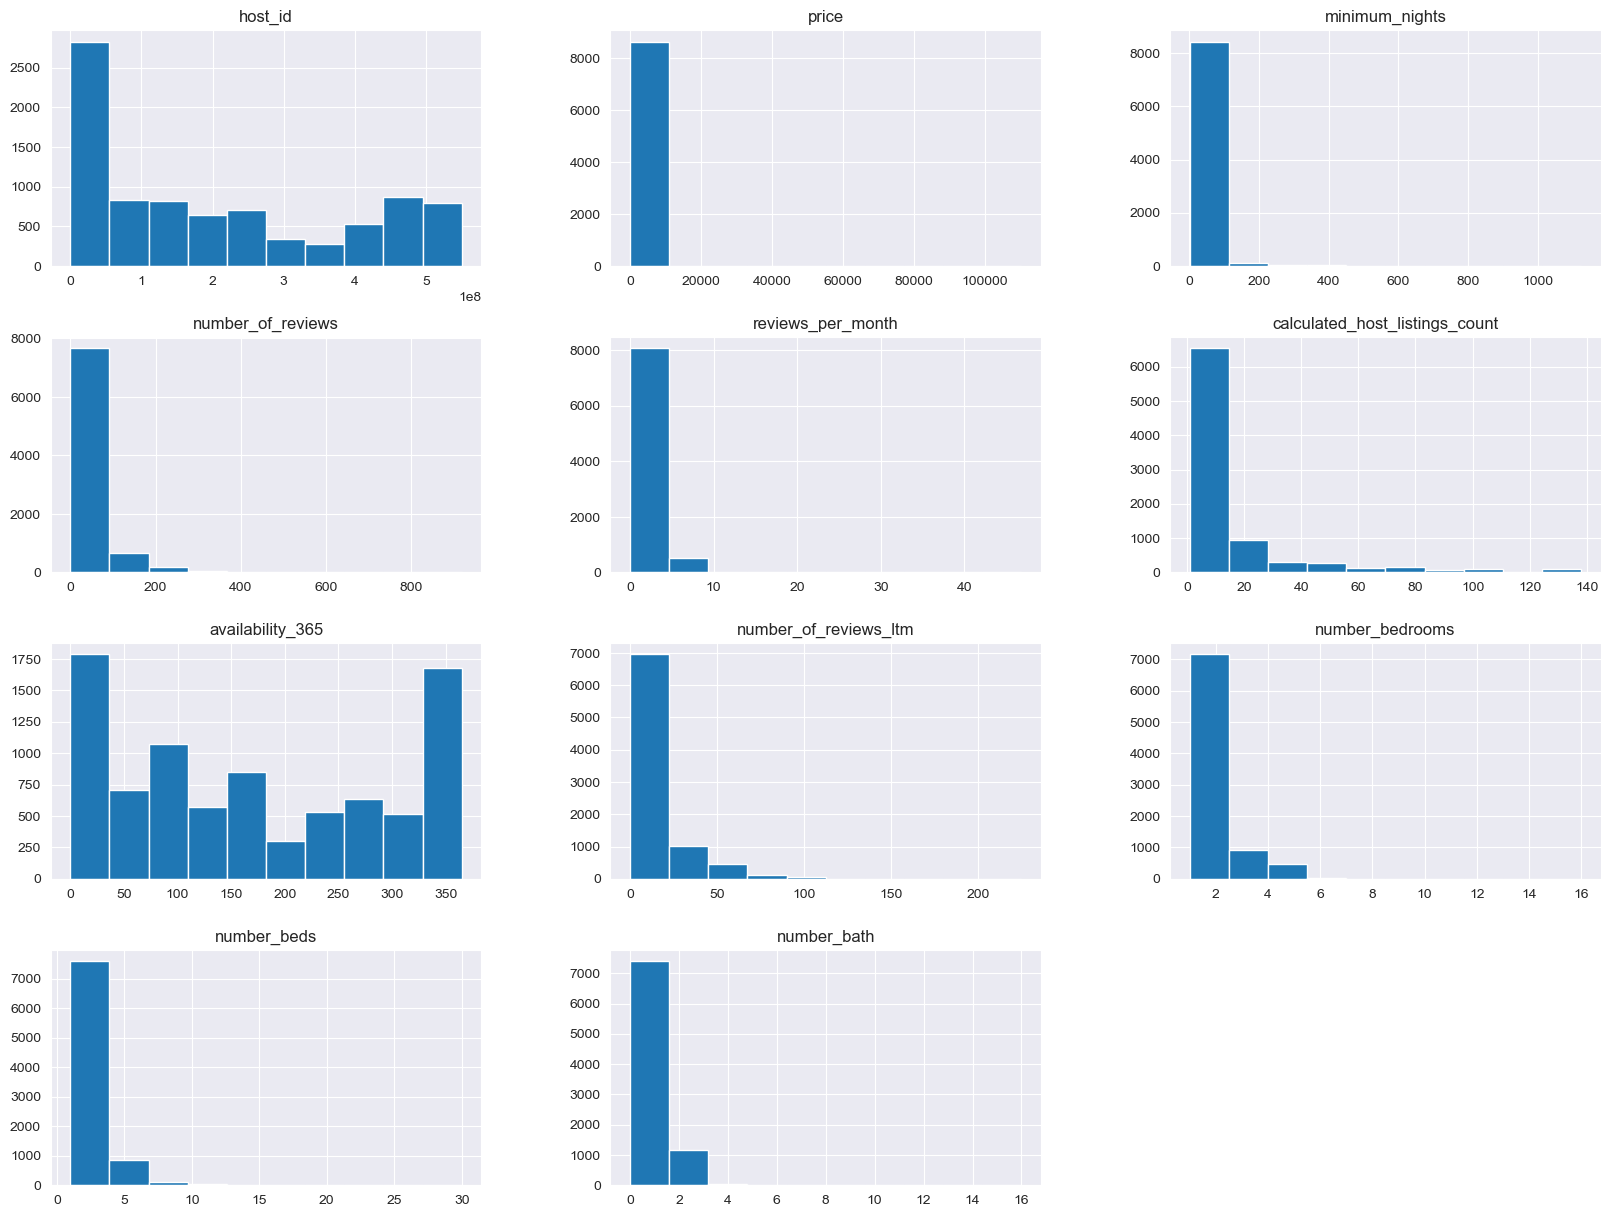

In [26]:
data_cleaned.hist(figsize=(20,15));